<h1>Create TensorRT Engine</h1>

In [2]:
from ultralytics import YOLO

model = YOLO("best.pt") # 모델 불러오기

model.export(format="engine")  # TensorRT format 저장

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.186 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7808MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 0.8s, saved as 'best.onnx' (42.7 MB)

TensorRT: starting export with TensorRT 10.12.0.36...
[08/26/2025-17:38:51] [TRT] [I] The logger passed into createInferBuilder differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing value.
[08/26/2025-17:38:53] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU -1357, GPU +0, now: CPU 3109, GPU 1012 (MiB)
[08/26/2025-17:38:53] [TRT] [I] ------

'best.engine'

TensorRT Engine으로 정상적으로 저장이 됨. (이때 Torch 버전 문제로 tensorrt_venv에서 구동하였음.)

<h1>Inference</h1>

In [2]:

from ultralytics import YOLO

model = YOLO("best.pt") #PyTorch
result = model.predict(source="../sample.jpg")


image 1/1 /home/kijung914/myisaac/myfiles/yolo_code/../sample.jpg: 384x640 1 clean_plate, 1 dirty_plate, 33.0ms
Speed: 2.7ms preprocess, 33.0ms inference, 87.5ms postprocess per image at shape (1, 3, 384, 640)


In [3]:
tensorrt_model = YOLO("best.engine") #TensorRT Engine
result = tensorrt_model.predict(source="../sample.jpg")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading best.engine for TensorRT inference...
[08/27/2025-13:34:30] [TRT] [I] Loaded engine size: 61 MiB
[08/27/2025-13:34:31] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +33, now: CPU 0, GPU 89 (MiB)

image 1/1 /home/kijung914/myisaac/myfiles/yolo_code/../sample.jpg: 640x640 1 clean_plate, 1 dirty_plate, 4.3ms
Speed: 1.8ms preprocess, 4.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


PyTorch  추론 시간 33.0ms

TensorRT 추론 시간 4.3ms

TensorRT가 약 8배 빠른 것을 확인할 수 있다

<h1>Iteration for Omniverse</h1>

In [1]:
from omniverse_iteration import omni_DL

obj = omni_DL('best.engine') #TensorRT로 수행, best.pt이면 PyTorch

✅ Using weights: best.engine
✅ Device: CUDA:0
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_5.jpg
Loading /home/kijung914/myisaac/myfiles/yolo_code/best.engine for TensorRT inference...
[08/28/2025-00:35:30] [TRT] [I] Loaded engine size: 61 MiB
[08/28/2025-00:35:30] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +33, now: CPU 0, GPU 89 (MiB)

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_5.jpg: 640x640 2 clean_plates, 1 dirty_plate, 6.2ms
Speed: 36.1ms preprocess, 6.2ms inference, 197.3ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
clean_plate
dirty_plate


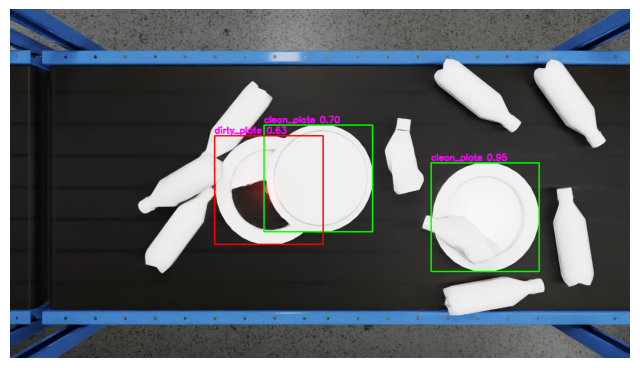

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_7.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_7.jpg: 640x640 2 clean_plates, 1 dirty_plate, 6.6ms
Speed: 2.8ms preprocess, 6.6ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
clean_plate


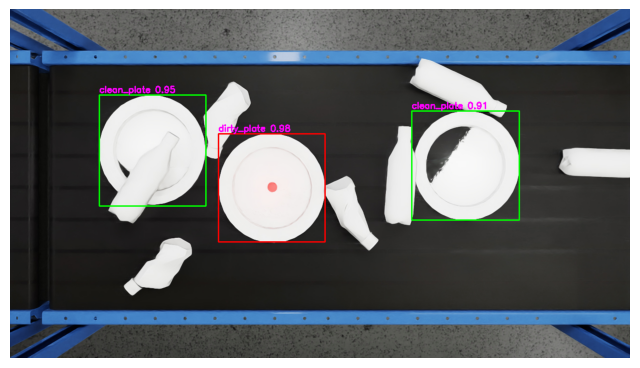

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_8.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_8.jpg: 640x640 2 clean_plates, 1 dirty_plate, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
clean_plate


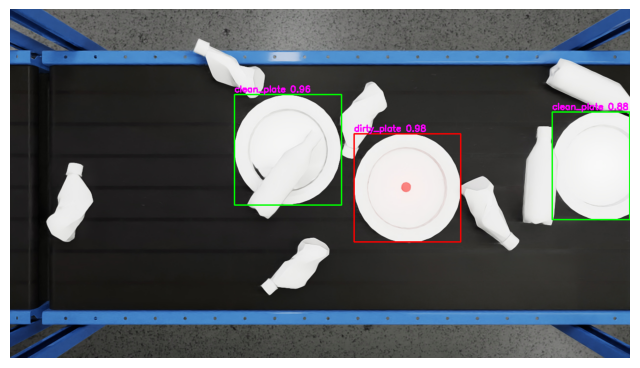

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_9.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_9.jpg: 640x640 2 clean_plates, 1 dirty_plate, 5.7ms
Speed: 2.9ms preprocess, 5.7ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
clean_plate


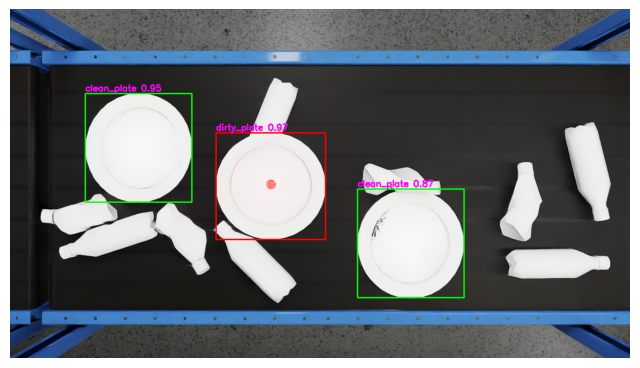

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_10.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_10.jpg: 640x640 2 clean_plates, 1 dirty_plate, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
dirty_plate
clean_plate


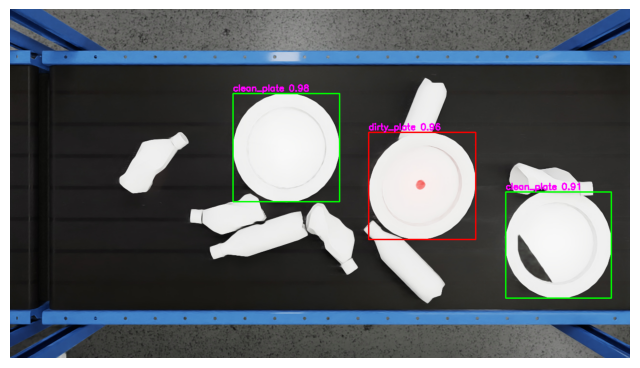

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_11.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_11.jpg: 640x640 2 clean_plates, 1 dirty_plate, 5.6ms
Speed: 2.6ms preprocess, 5.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
clean_plate
dirty_plate


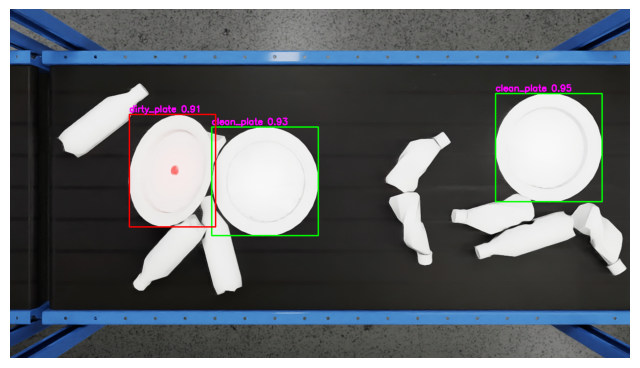

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_13.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_13.jpg: 640x640 2 clean_plates, 2 dirty_plates, 6.0ms
Speed: 2.4ms preprocess, 6.0ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
dirty_plate
clean_plate


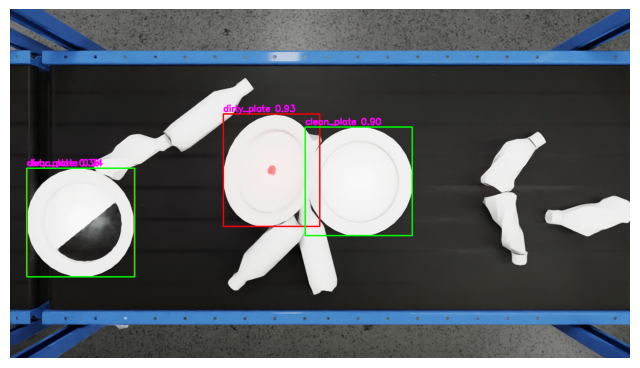

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_14.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_14.jpg: 640x640 2 clean_plates, 1 dirty_plate, 5.1ms
Speed: 2.1ms preprocess, 5.1ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
clean_plate


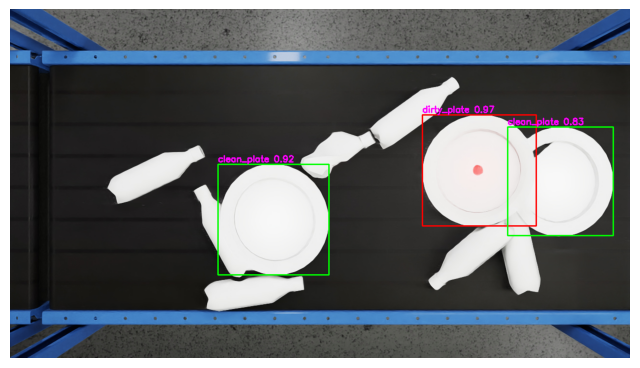

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_15.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_15.jpg: 640x640 3 clean_plates, 1 dirty_plate, 3.9ms
Speed: 2.4ms preprocess, 3.9ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
clean_plate
clean_plate


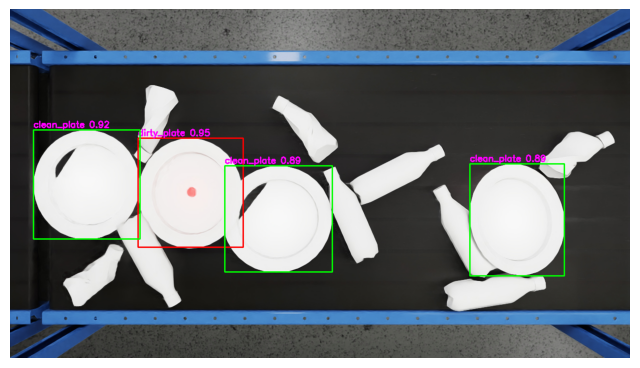

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_17.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_17.jpg: 640x640 4 clean_plates, 2 dirty_plates, 5.7ms
Speed: 2.3ms preprocess, 5.7ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
clean_plate
clean_plate
dirty_plate
dirty_plate
clean_plate


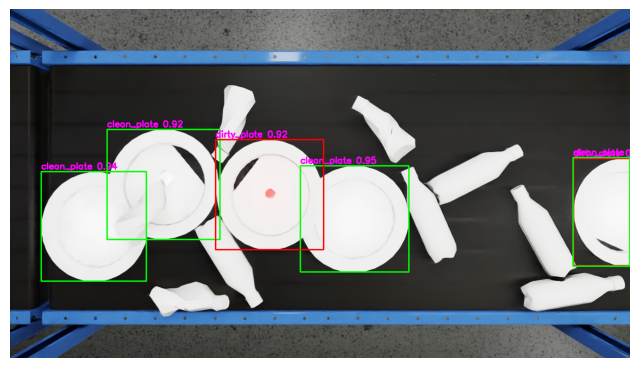

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_18.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_18.jpg: 640x640 7 clean_plates, 3.5ms
Speed: 2.2ms preprocess, 3.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
clean_plate
clean_plate
clean_plate
clean_plate
clean_plate
clean_plate


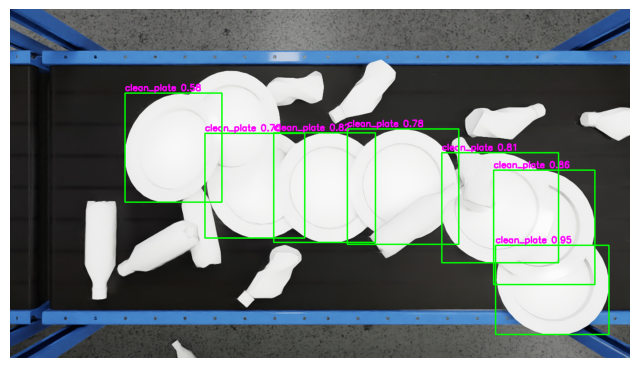

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_20.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_20.jpg: 640x640 6 clean_plates, 2 dirty_plates, 5.9ms
Speed: 2.4ms preprocess, 5.9ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)
clean_plate
dirty_plate
clean_plate
clean_plate
clean_plate
dirty_plate
clean_plate
clean_plate


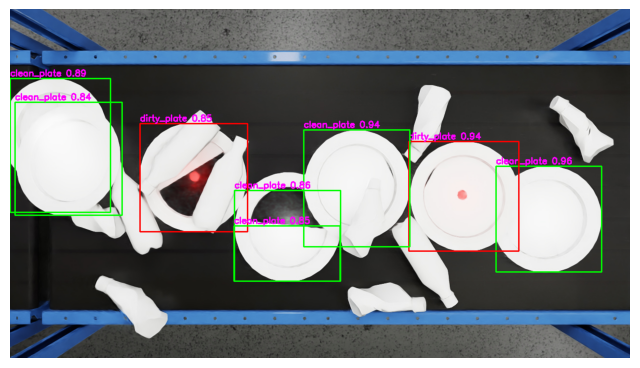

/home/kijung914/myisaac/myfiles/captured/decide_camera/frame_21.jpg

image 1/1 /home/kijung914/myisaac/myfiles/captured/decide_camera/frame_21.jpg: 640x640 4 clean_plates, 4 dirty_plates, 5.9ms
Speed: 2.8ms preprocess, 5.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
dirty_plate
clean_plate
dirty_plate
clean_plate
clean_plate
dirty_plate
clean_plate
dirty_plate


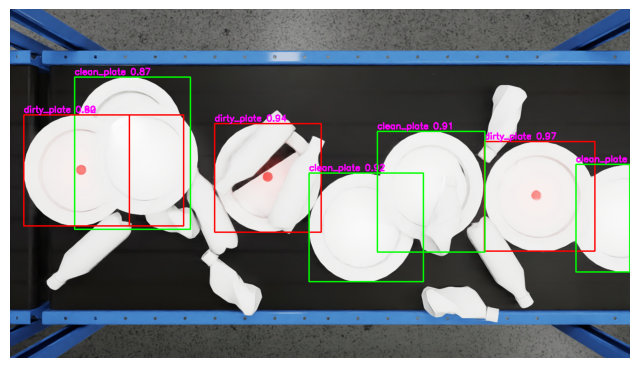

In [ ]:
obj.begin()
# Interrupt 걸릴 때까지 json 파일 확인하고, omniverse에서 새로운 사진을 생성했는지 확인
# Interence 수행 후 결과를 json으로 저장